# BST 267: Introduction to Social and Biological Networks (2017)
# Homework 2

In this homework, you'll get practice with commonly used Python data types and with some common Python operations. Consult lecture notes for lectures 3 and 4 for help. If you're stuck, use Google or your favorite search engine to look for help.

## Question 1: Lists

Create a list called `numbers` that contains numbers 1,3,5,...,99. In other words, the numbers in this list range from 1 to 99 in increments of 2. Compute the square root of each number on this list and store the square roots in a list called `roots`. Note that `numbers` and `roots` should have the same number of elements. Print out the elements of `numbers` and `roots`, i.e., a number and its square root. Once you're done, run the code underneath to create a plot.

In [10]:
numbers = list(range(1,100,2))
import numpy as np
roots = list(np.sqrt(numbers))
print(numbers, roots)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99] [1.0, 1.7320508075688772, 2.2360679774997898, 2.6457513110645907, 3.0, 3.3166247903553998, 3.6055512754639891, 3.872983346207417, 4.1231056256176606, 4.358898943540674, 4.5825756949558398, 4.7958315233127191, 5.0, 5.196152422706632, 5.3851648071345037, 5.5677643628300215, 5.7445626465380286, 5.9160797830996161, 6.0827625302982193, 6.2449979983983983, 6.4031242374328485, 6.5574385243020004, 6.7082039324993694, 6.8556546004010439, 7.0, 7.1414284285428504, 7.2801098892805181, 7.416198487095663, 7.5498344352707498, 7.6811457478686078, 7.810249675906654, 7.9372539331937721, 8.0622577482985491, 8.1853527718724504, 8.3066238629180749, 8.426149773176359, 8.5440037453175304, 8.6602540378443873, 8.7749643873921226, 8.8881944173155887, 9.0, 9.1104335791442992, 9.2195444572928871, 9.3273790530888157, 9.43

Text(0,0.5,'Square root of x')

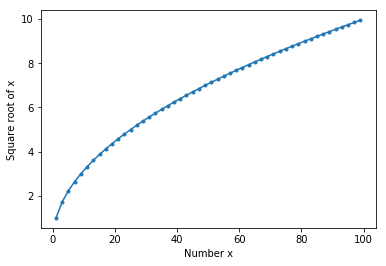

In [11]:
# run this code once you have `numbers` and `roots`
import matplotlib.pyplot as plt
% matplotlib notebook
% matplotlib inline
plt.plot(numbers, roots, '.-')
plt.xlabel("Number x")
plt.ylabel("Square root of x")

## Question 2: More lists

Python objects can be nested within other Python objects. Below we have an example of a list nested within another list. To create this list of lists, run the code below. Examine each line of code and make sure you understand what it does. Briefly, the code generates a so-called Barabasi-Albert graph and assigns it to variable `G`. The first loop is over all nodes of the graph and the second over all neighbors of each node. In the end, the list `neighbor_degrees` will contain as many lists are there are nodes in the graph, and each nested list will contain the degrees of the neighboring nodes of the given node.

In [12]:
# run this code first
import networkx as nx
G = nx.barabasi_albert_graph(1000, 2, seed=123)
node_degrees = []
neighbor_degrees = []
for node in G.nodes():
    node_degrees.append(G.degree(node))
    degrees = []
    for neighbor in G.neighbors(node):
        degrees.append(G.degree(neighbor))
    neighbor_degrees.append(degrees)

Now write the code to compute the average neighbor degree of each node, i.e., the average degree of the neighbors of each node. Use `plt.plot` to make a plot of degree on the x-axis and average neighbor degree on the y-axis. **Use `plt.xlabel` and `plt.ylabel` functions to label your plot.**

NOTE: Core Python language is lean, meaning that it has relatively few built-in functions, and the language becomes expressive when we use some of the many existing libraries, such as `networkx`. As a consequence, there is no built-in function for computing the mean of a sequence of numbers stored in a list. To compute the mean, you can simply add up the numbers in the list and then divide the result by the number of elements in your list. Alternatively, you can use the `mean` function in the `numpy` library.

In [13]:
average_neighbor_degree = []
for sublist in neighbor_degrees:
    average_neighbor_degree.append([np.mean(sublist)]) 

Text(0,0.5,'Average Neighbor Degree')

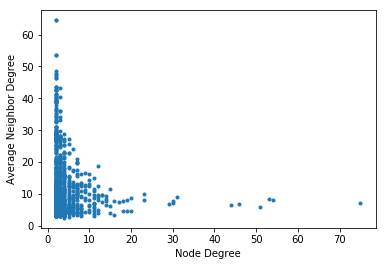

In [18]:
plt.plot(node_degrees, average_neighbor_degree, '.')
plt.xlabel("Node Degree")
plt.ylabel("Average Neighbor Degree")

## Question 3: Dictionaries and lists

There are several centrality measures that are used to quantify the centrality or importance of a node in a network. Degree, also known as degree centrality, is the most commonly used metric, but another centrality measure is so-called betweenness centrality. In NetworkX, if the network object is called `G`, then `G.degree()` returns a dictionary of node degrees: the keys are node IDs and the values are node degrees. You can compute betweenness centrality using the the `betweenness_centrality` function in the `nx` library. In other words, `nx.betweenness_centrality(G)` returns a dictionary of betweenness centrality values: the keys are node IDs and the values of node betweenness centrality values. (It's worth noting the following difference: the degree dictionary is available as a method of the network object `G` whereas the betweenness centrality dictionary is computed by calling a method or function in the `nx` library.) Generate two dictionaries, one for degree centrality and one for betweenness centrality. Then generate two lists called `x` and `y` corresponding to degree centrality and betweenness centrality, respectively, and plot them against one another. Make sure that the values in `x` and `y` for any given index are always for the same node as otherwise your plot will not be correct. **Use `plt.xlabel` and `plt.ylabel` functions to label your plot.**


In [16]:
betweenness =nx.betweenness_centrality(G)
degree_centrality = dict(G.degree())

x = []
y = []

for key in range(1000):
    x.append(list(degree_centrality.values()))
    y.append(list(betweenness.values()))
    

Text(0,0.5,'Betweenness Centrality')

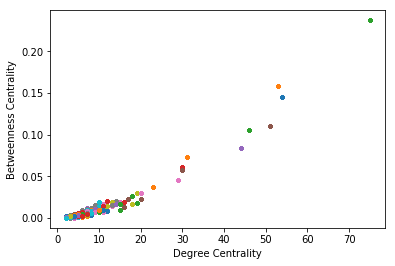

In [17]:
plt.plot(x, y, '.-')
plt.xlabel("Degree Centrality")
plt.ylabel("Betweenness Centrality")